In [19]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

Load the Exploratory Data Analysis pickle file and build the model

In [21]:
df_eda = pickle.load(open('C:\\Users\\Dell\\Desktop\\Vehicle Insurance DataSet\\model\\ExploratoryDataAnalysis.pkl','rb'))

In [22]:
df_eda.shape

(370789, 12)

In [23]:
df_eda.size

4449468

In [24]:
df_eda.isnull().sum().sum()

0

<AxesSubplot:>

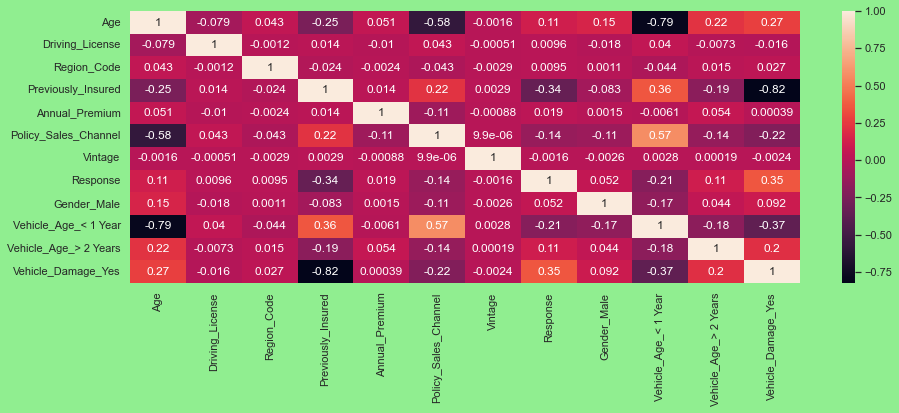

In [25]:
sns.set(rc={'figure.facecolor':'lightgreen'})
plt.figure(figsize=(15,5))
sns.heatmap(df_eda.corr(),annot=True)

In [26]:
#independent and dependent variable
X=df_eda.drop(columns=['Response'],axis=1)
y=df_eda['Response']

In [27]:
#splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
#size of the train and test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((259552, 11), (111237, 11), (259552,), (111237,))

In [ ]:
#building a Random Forest classifier model
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

In [12]:
#predicting the outcome value
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
#evaluating the performance of the training data
rfc.score(X_train,y_train)

0.9998805634323757

In [14]:
#evaluating the performance of the test data/predicting data
accuracy_score(y_test,y_pred)

0.8675350827512428

In [15]:
print(classification_report(y_test,y_pred))
metrics.confusion_matrix

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     97751
           1       0.36      0.12      0.18     13486

    accuracy                           0.87    111237
   macro avg       0.62      0.55      0.55    111237
weighted avg       0.82      0.87      0.84    111237



<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

AxesSubplot(0.125,0.125;0.62x0.755)


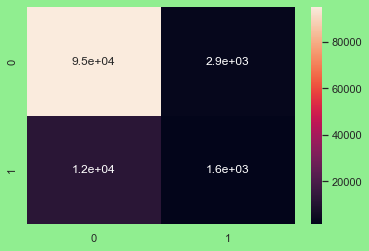

In [16]:
print(sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True))

In [18]:
#Loading the test model prediction data in pickle file
with open(r'C:\Users\Dell\Desktop\Vehicle_Insurance_Dataset\model\test_model.pkl','wb') as file:
    pickle.dump(rfc,file)